In [26]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import glob
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from yellowbrick.cluster import KElbowVisualizer

ModuleNotFoundError: No module named 'yellowbrick'

In [27]:
data = pd.read_csv('Telco_customer_churn_adapted_v2_cleaned.csv')

In [28]:
data.head()

,Tenure Months,Location,Device Class,Games Product,Music Product,Education Product,Call Center,Video Product,Use MyApp,Payment Method,Monthly Purchase (Thou. IDR),Churn Label,Longitude,Latitude,CLTV (Predicted Thou. IDR)
0,2,Jakarta,Mid End,Yes,Yes,No,No,No,No,Digital Wallet,70.005,Yes,106.816666,-6.2,4210.7
1,2,Jakarta,High End,No,No,No,No,No,No,Pulsa,91.910,Yes,106.816666,-6.2,3511.3
2,8,Jakarta,High End,No,No,Yes,No,Yes,Yes,Pulsa,129.545,Yes,106.816666,-6.2,6983.6
3,28,Jakarta,High End,No,No,Yes,Yes,Yes,Yes,Pulsa,136.240,Yes,106.816666,-6.2,6503.9
4,49,Jakarta,High End,No,Yes,Yes,No,Yes,Yes,Debit,134.810,Yes,106.816666,-6.2,6942.0


In [29]:
data.dtypes

Tenure Months                     int64
Location                         object
Device Class                     object
Games Product                    object
Music Product                    object
Education Product                object
Call Center                      object
Video Product                    object
Use MyApp                        object
Payment Method                   object
Monthly Purchase (Thou. IDR)    float64
Churn Label                      object
Longitude                       float64
Latitude                        float64
CLTV (Predicted Thou. IDR)      float64
dtype: object

In [30]:
data = data.apply(LabelEncoder().fit_transform)

In [31]:
data.head()

,Tenure Months,Location,Device Class,Games Product,Music Product,Education Product,Call Center,Video Product,Use MyApp,Payment Method,Monthly Purchase (Thou. IDR),Churn Label,Longitude,Latitude,CLTV (Predicted Thou. IDR)
0,2,1,2,2,2,0,0,0,0,2,436,1,0,1,867
1,2,1,0,0,0,0,0,0,0,3,729,1,0,1,486
2,8,1,0,0,0,2,0,2,2,3,1274,1,0,1,2587
3,28,1,0,0,0,2,1,2,2,3,1371,1,0,1,2260
4,49,1,0,0,2,2,0,2,2,1,1349,1,0,1,2556


In [32]:
data = data.drop(columns=["Location","Payment Method","Longitude","Latitude"])

In [33]:
scaler = StandardScaler()
scaler.fit(data)
scaled_data = pd.DataFrame(scaler.transform(data), columns = data.columns)

In [35]:
copy= scaled_data.copy()

In [46]:
copy= copy.iloc[:,:].values

In [48]:
copy

array([[-1.23672422,  1.24547707,  1.40732123, ..., -0.51731743,
         1.66382851, -0.99005467],
       [-1.23672422, -1.02762347, -0.91883775, ...,  0.0950415 ,
         1.66382851, -1.39507856],
       [-0.99240204, -1.02762347, -0.91883775, ...,  1.23407091,
         1.66382851,  0.83839963],
       ...,
       [ 1.61370124, -1.02762347, -0.91883775, ...,  1.37200841,
        -0.60102348,  1.01805589],
       [-0.87024095,  1.24547707,  1.40732123, ..., -1.14221613,
        -0.60102348, -1.32704305],
       [ 1.36937906, -1.02762347,  1.40732123, ...,  1.4723266 ,
        -0.60102348,  0.58114036]])

In [37]:
pca = PCA(n_components=4)
pca.fit(scaled_data)
pca_data = pd.DataFrame(pca.transform(scaled_data), columns=(["col1","col2","col3","col4"]))

In [38]:
pca_data.describe()

,col1,col2,col3,col4
count,7.043000e+03,7043.000000,7.043000e+03,7.043000e+03
mean,3.228364e-17,0.000000,-1.916841e-17,1.614182e-17
std,1.697956e+00,1.414544,9.970609e-01,9.668430e-01
min,-3.686096e+00,-3.068269,-3.134581e+00,-1.977229e+00
25%,-1.187237e+00,-1.108699,-6.925460e-01,-1.020937e+00
50%,-2.064050e-01,-0.292154,-2.014681e-02,1.495507e-02
75%,1.114600e+00,1.215349,6.911996e-01,7.037969e-01
max,4.322778e+00,3.232550,3.509510e+00,2.886841e+00


In [39]:
pca_data = pca_data.iloc[:,:].values

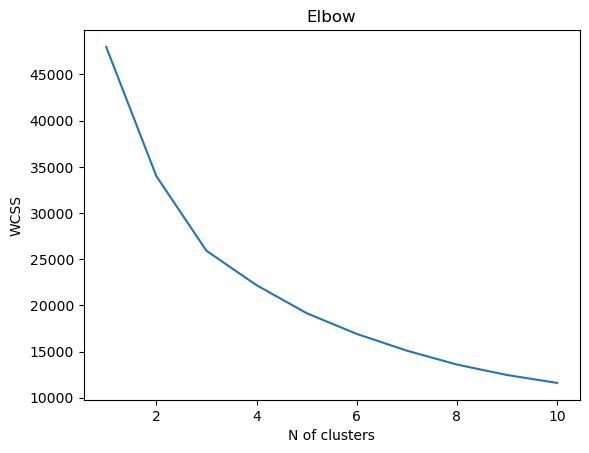

In [40]:
wcss = []
for i in range(1,11):
    kmeans = KMeans(n_clusters = i, init = 'k-means++', random_state = 42)
    kmeans.fit(pca_data)
    wcss.append(kmeans.inertia_)
plt.plot(range(1,11), wcss)
plt.title('Elbow')
plt.xlabel('N of clusters')
plt.ylabel('WCSS')
plt.show()

In [41]:
kmeans = KMeans(n_clusters=3, init = 'k-means++', random_state=42)
y_kmeans = kmeans.fit_predict(pca_data)

In [42]:
y_kmeans

array([2, 0, 0, ..., 1, 2, 1])

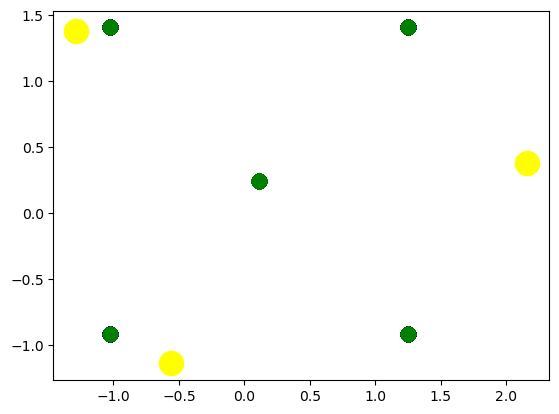

In [50]:
plt.scatter(copy[y_kmeans==0, 1], copy[y_kmeans==0, 2], s = 100, c = 'red', label = 'Cluster 1')
plt.scatter(copy[y_kmeans==1, 1], copy[y_kmeans==1, 2], s = 100, c = 'blue', label = 'Cluster 2')
plt.scatter(copy[y_kmeans==2, 1], copy[y_kmeans==2, 2], s = 100, c = 'green', label = 'Cluster 3')
#plt.scatter(copy[y_kmeans==3, 0], copy[y_kmeans==3, 1], s = 100, c = 'cyan', label = 'Cluster 4')
#plt.scatter(copy[y_kmeans==4, 0], copy[y_kmeans==4, 1], s = 100, c = 'magenta', label = 'Cluster 5')
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s = 300, c = 'yellow', label = 'Centroids')
plt.show()